# Python для Анализа данных

## Домашнее задание 9: Визуализация данных с Seaborn

## Вариант Light

### Задача 1

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import pandas as pd

Установите (любой на ваш вкус) общий стиль графиков на весь ноутбук используя функцию set_style

In [2]:
sns.set_style('whitegrid', {'x.tick.color': 'red', 'ytick.color': 'red'})

### Задача 2

Подгрузите данные datatraining.txt при помощи соответствующей функции библиотеки Pandas. Преобразуйте индекс в datetime index, удалите столбец с датой. Постройте график всех парных взаимосвязей с разметкой цвета в соответствии с метками классов (столбец Occupancy)

P.S. используйте функцию sns.pairplot c параметром hue

In [6]:
df = pd.read_csv(r"C:\Users\qu4n7\Desktop\1\neural_python\_7\datatraining.txt", sep=',')
df.head(2)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1


In [7]:
df.index = pd.to_datetime(df.date)

In [8]:
df = df.drop('date', axis=1)

C:\Users\qu4n7\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\qu4n7\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


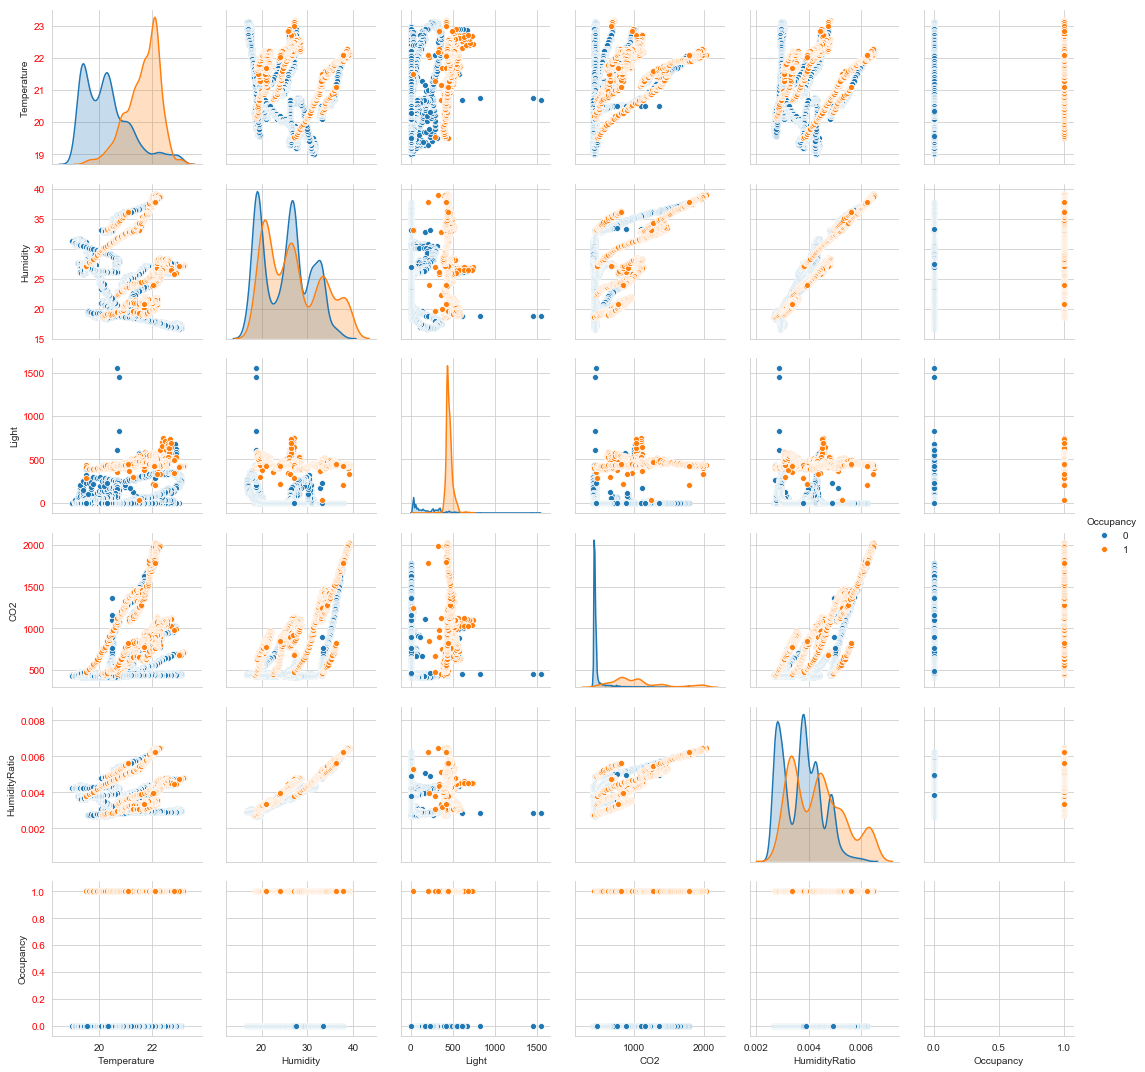

In [9]:
sns.pairplot(df, hue='Occupancy')
plt.show();

### Задача 3

Постройте boxplot всех признаков.

P.S. график должен быть читаемым, т.е.
* отрегулируйте размер графика
* предварительно "отскейлите" все *числовые* признаки, т.е. приведите к стандартному нормальному распределению при помощи функции ниже (Occupancy скейлить не надо (!))

In [10]:
def scale(df):
    return (df - df.mean()) / df.std()

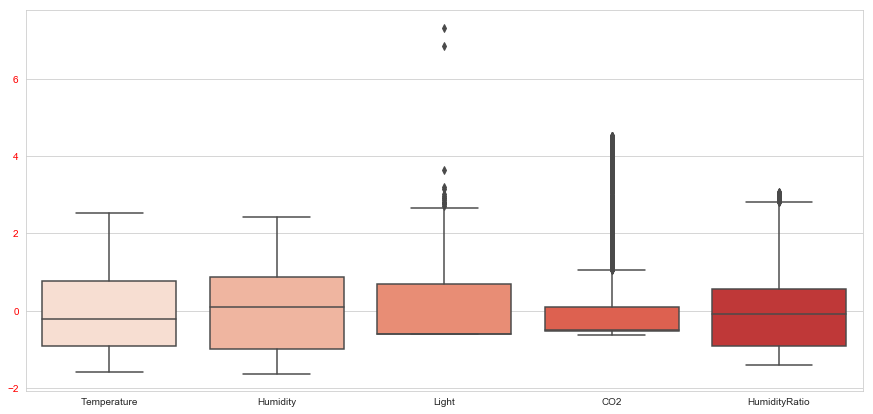

In [11]:
plt.figure(figsize=(15,7))
sns.boxplot(data=scale(df.drop('Occupancy', axis=1)), palette=sns.color_palette('Reds'))
plt.show()

### Задача 4

Постройте violinplot всех признаков

P.S. Предварительно приведите их к стандартному нормальному распределению как мы делали в предыдущей задаче

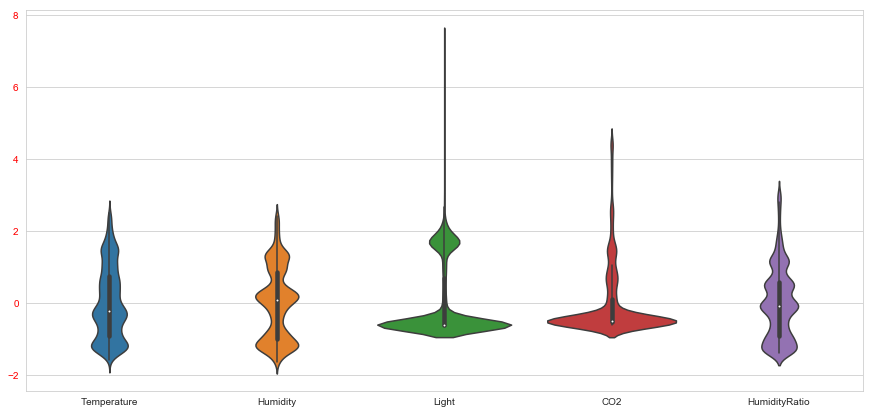

In [12]:
plt.figure(figsize=(15,7))
sns.violinplot(data=scale(df.drop('Occupancy', axis=1)))
plt.show()

### Задача 5

Нарисуйте heatmap матрицы корреляций. Отрегулируйте масштаб, подберите подходящую палитру

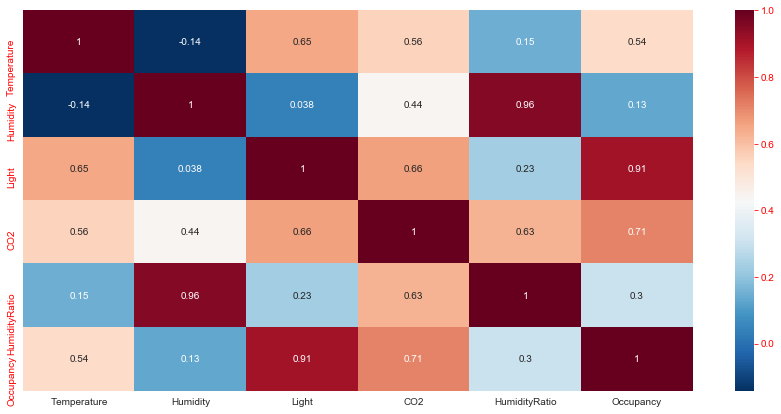

In [13]:
plt.figure(figsize=(15,7))
corr = df.corr()
sns.heatmap(corr, cmap=sns.color_palette("RdBu_r", 1000),annot=True)
plt.show()

## Задачи Pro

### Задача 6

Постройте диаграмму присутствия в разбивке по часам и меткам классов. Для этого:
    * создайте новый столбец "hour", отвечающий соответствующему часу 
    * нарисуйте sns.countplot этого столбца в разбивке по Ocuupancy

In [14]:
df['hour'] = df.index.hour
#df.hour.unique()

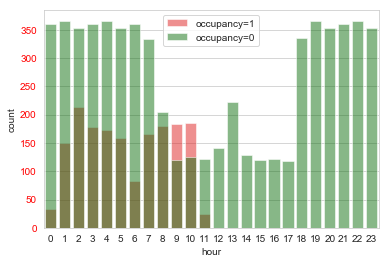

In [15]:
sns.countplot(df.hour[df.Occupancy==1], color='red', alpha=0.5, label='occupancy=1')
sns.countplot(df.hour[df.Occupancy==0], color='green', alpha=0.5, label='occupancy=0')
plt.legend()
plt.show()

### Задача 7

Сделайте resample данных по получасовому интервалу с использованием усреднения для всех признаков. Обратите внимание, что столбец с метками класса Occupancy вместо усреднения нужно взять "как есть", т.е. resample c методом "asfreq" или "bfill".

Постройте jointplot между признаками Light и CO2

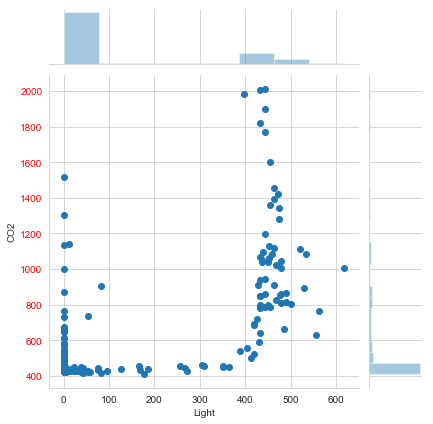

In [16]:
sns.jointplot(df.resample('30min').bfill().Light,df.resample('30min').bfill().CO2) 
plt.show();

### Задача 8

Постройте pairplot по данным после ресемплинга. В чем отличие от графиков в задаче 2? Сделайте вывод

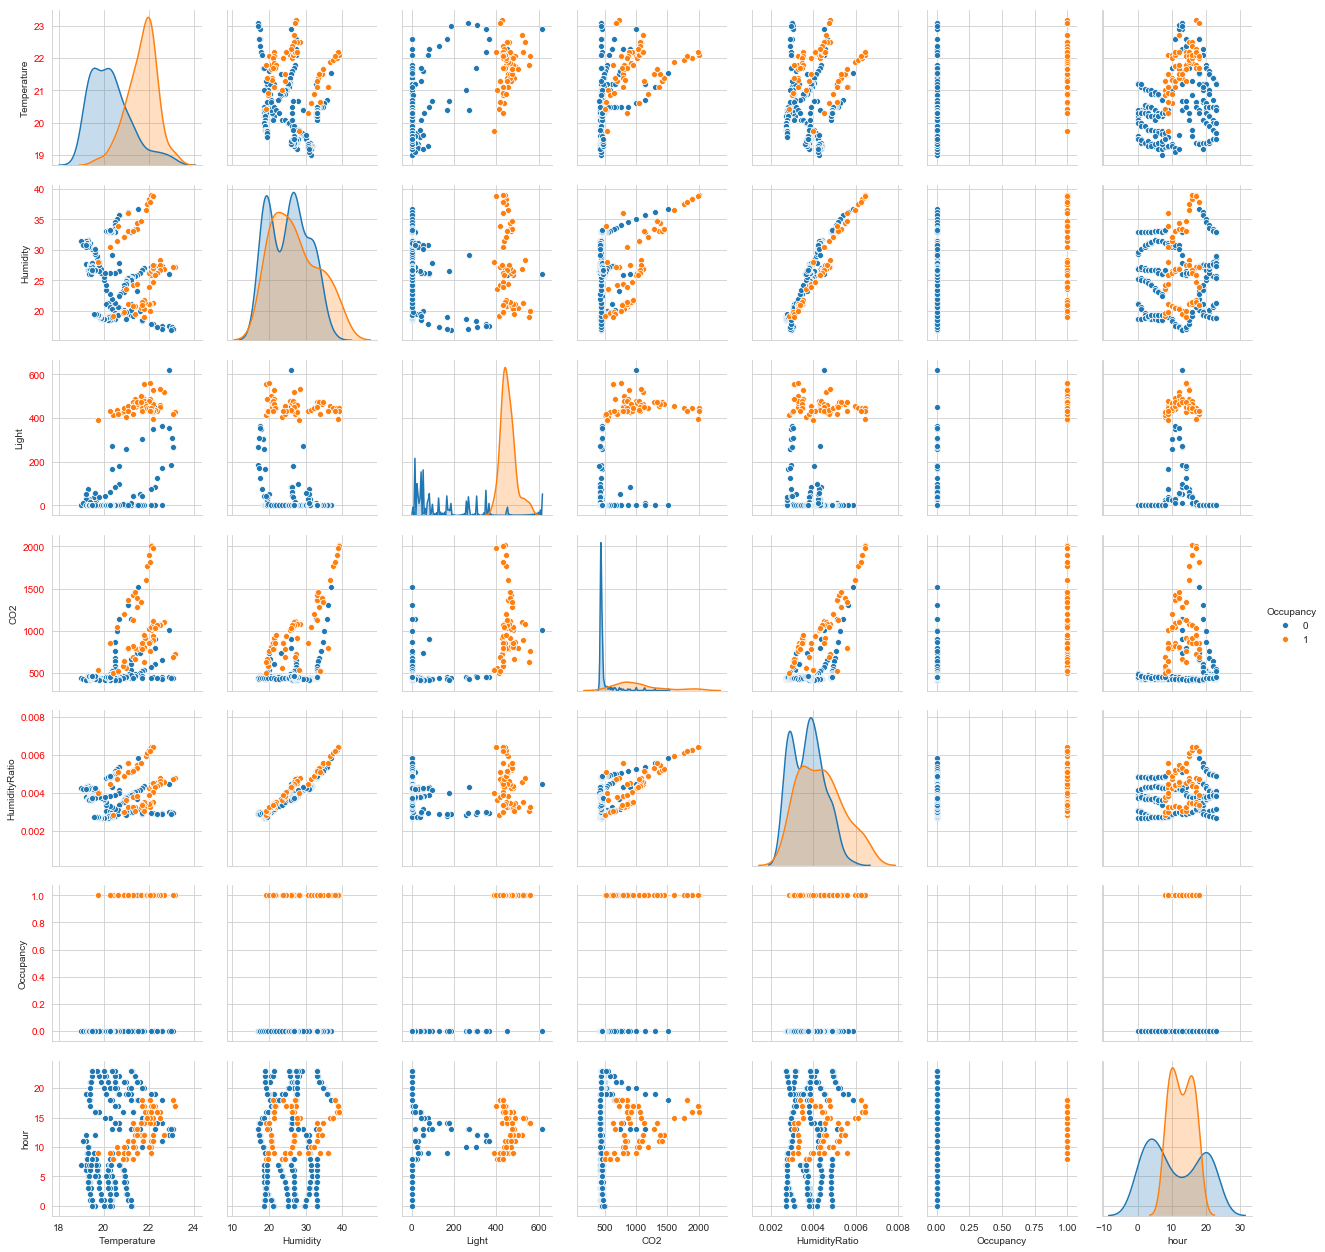

In [17]:
sns.pairplot(df.resample('30min').bfill(), hue='Occupancy')

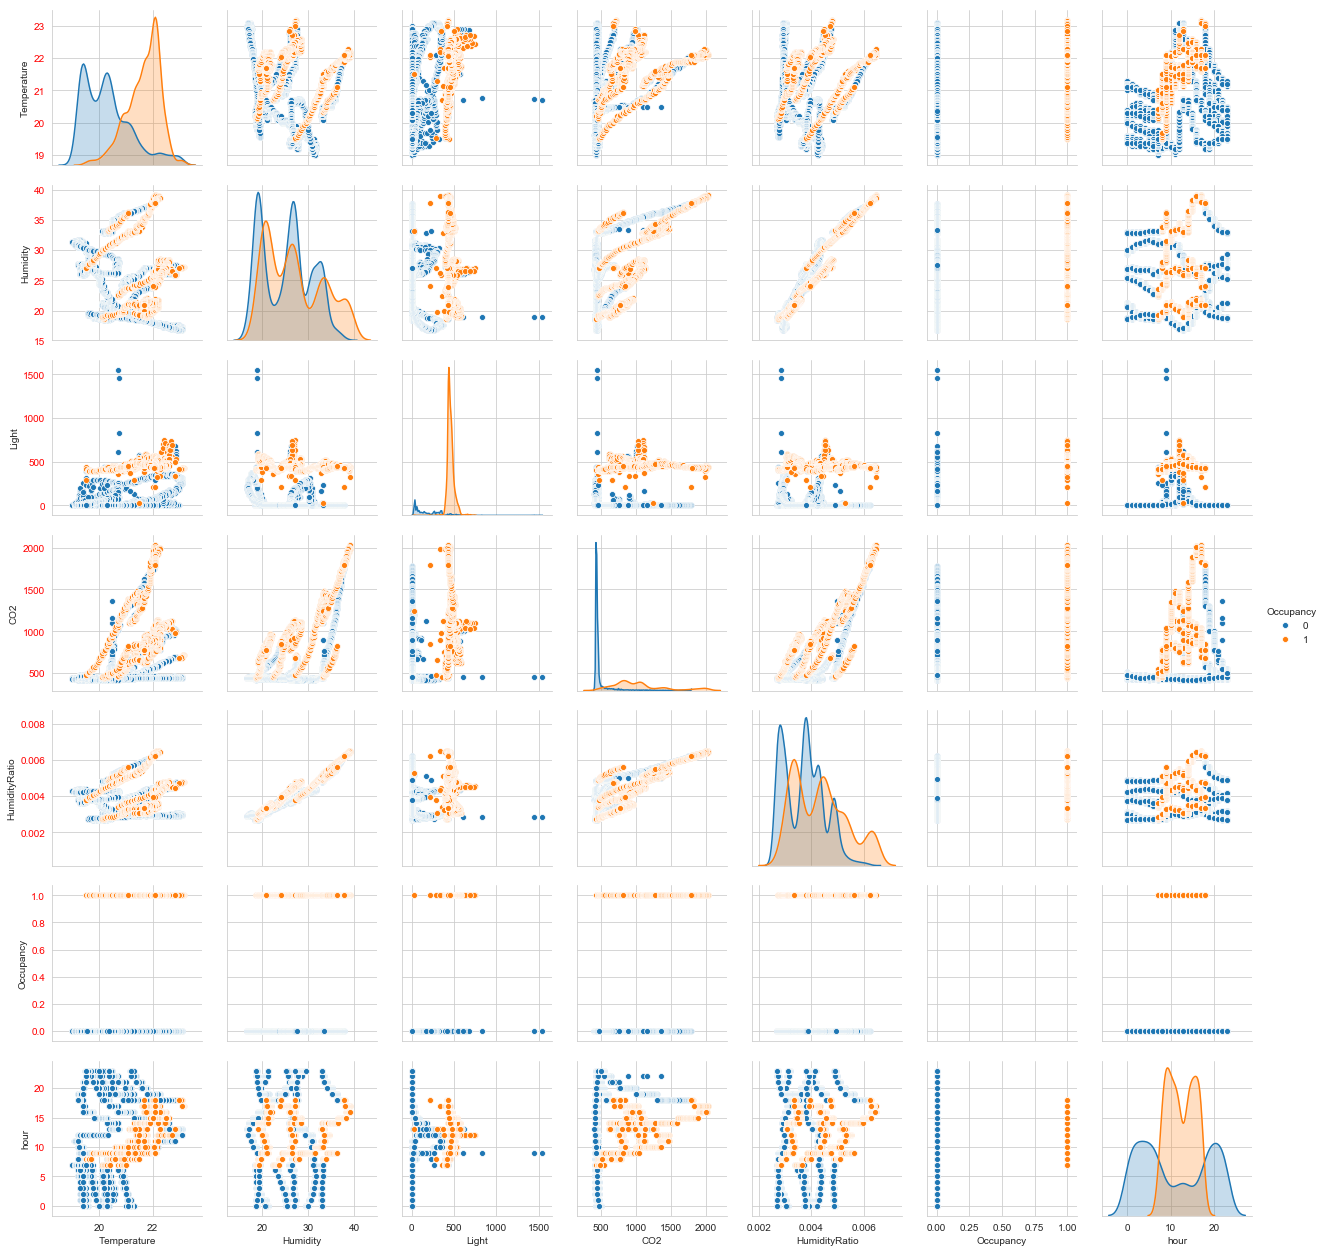

In [18]:
sns.pairplot(df, hue='Occupancy')
plt.show();

1) увеличилось кол-во наблюдений 

2) появилось больше выбросов, меньше усреднений $\rightarrow$ меняютяс контуры графика

### Задача 9

Постройте boxplot всех признаков с разбивкой по Occupancy. Для правильной отрисовки необходимо:
    * создать новый текстовый столбец с расшифровкой столбца Occupancy, например, если 0 - то 'No', если 1 - то 'Yes
    * передать этот столбец в качестве соответствующего параметра боксплоту
    * для каждого признака нужен отдельный график

In [19]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,hour
date,,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,17
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,17
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,17
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,17
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,17


In [20]:
df.loc[df.Occupancy == 1, 'text'] = 'yes'
df.loc[df.Occupancy == 0, 'text'] = 'no'

In [21]:
df.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,hour,text
date,,,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,17,yes
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,17,yes
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,17,yes
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,17,yes
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,17,yes


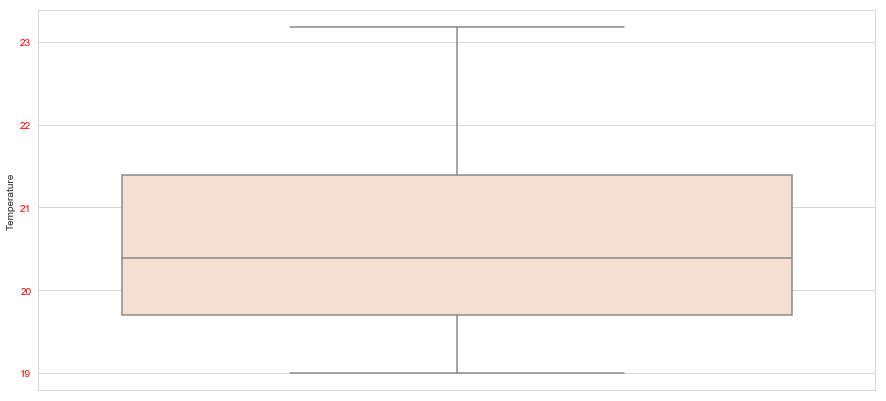

In [25]:
plt.figure(figsize=(15,7))
sns.boxplot(palette=sns.color_palette('Reds'),
            y = df.Temperature,
            hue = df.text)
plt.show()

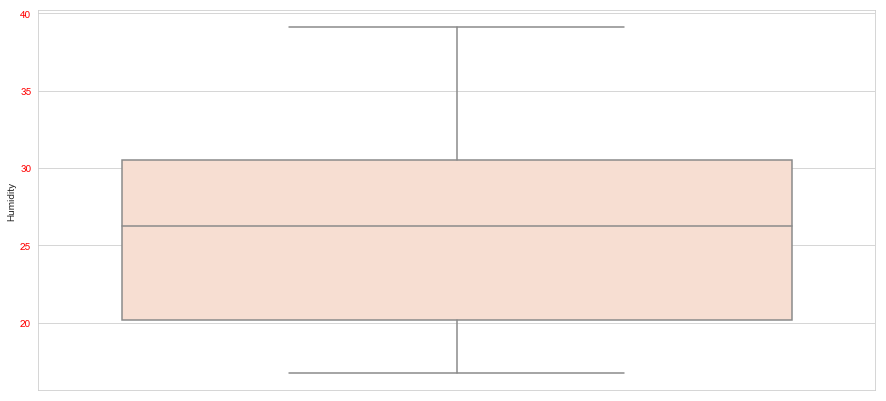

In [29]:
plt.figure(figsize=(15,7))
sns.boxplot(palette=sns.color_palette('Reds'),
            y = df.Humidity,
            hue = df.text)
plt.show()

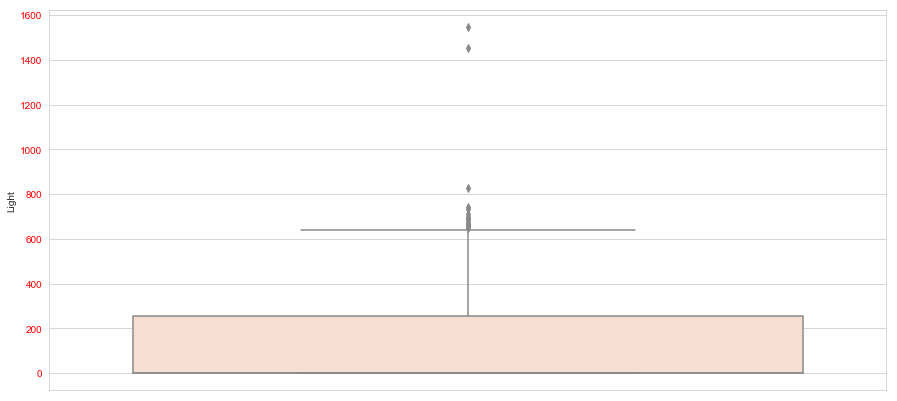

In [31]:
plt.figure(figsize=(15,7))
sns.boxplot(palette=sns.color_palette('Reds'),
            y = df.Light,
            hue = df.text)
plt.show()

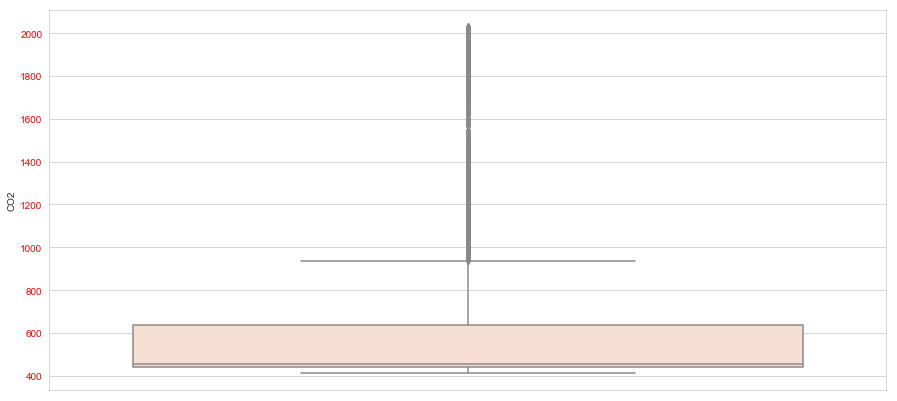

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot(palette=sns.color_palette('Reds'),
            y = df.CO2,
            hue = df.text)
plt.show()

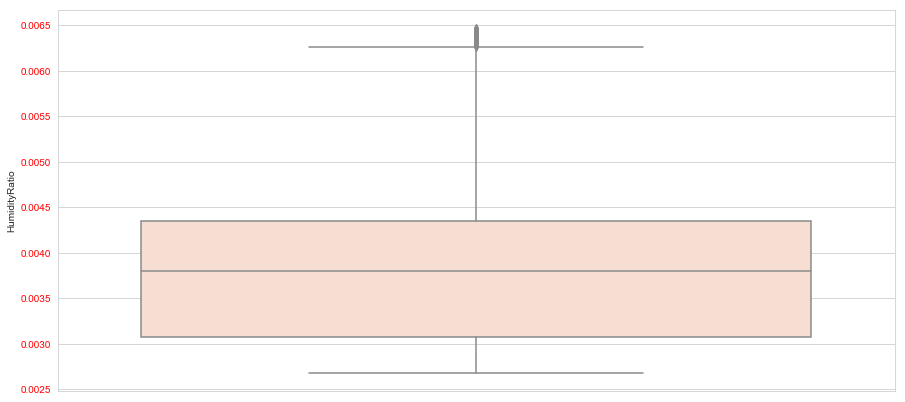

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(palette=sns.color_palette('Reds'),
            y = df.HumidityRatio,
            hue = df.text)
plt.show()

### Задача 10

Принимая во внимание все построенные выше графики, сделайте вывод о взаимосвязях в данных (напишите несколько предложений о том, что вы заметили)

Меня в первую очередь интересует корреляция таргета и признаков. Наибольшая, судя по графикам, у Light, CO2 и Temperature. Эти признаки я бы почистил в первую очередь. Причем у CO2 много выбросов.

Отдельно заментно на часовой диаграмме временная привязанность таргета.